In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv("/kaggle/input/fog-daa/train_set.csv")
test_data = pd.read_csv("/kaggle/input/fog-daa/test_set.csv")
val_data = pd.read_csv("/kaggle/input/fog-daa/val_set.csv")

In [3]:
columns_to_drop = [ '30min_vsby_km', '1hr_vsby_km', '1.5hr_vsby_km', '2hr_vsby_km', '2.5hr_vsby_km', 
                    '6hr_vsby_km', '30min_fog', '1hr_fog', '1.5hr_fog', '2hr_fog', '2.5hr_fog', 
                    '3hr_fog', '6hr_fog', '30min_fog_type', '1hr_fog_type', '1.5hr_fog_type', 
                    '2hr_fog_type', '2.5hr_fog_type','3hr_fog_type', '6hr_fog_type', '3hr_onset_cond','date_time_IST']

In [4]:
train_data = train_data.drop(columns = columns_to_drop)
test_data = test_data.drop(columns = columns_to_drop)
val_data = val_data.drop(columns = columns_to_drop)

In [5]:
combined_data = pd.concat([train_data,val_data])

In [6]:
y_train_val = combined_data['3hr_vsby_km']
y_test = test_data['3hr_vsby_km']

In [7]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

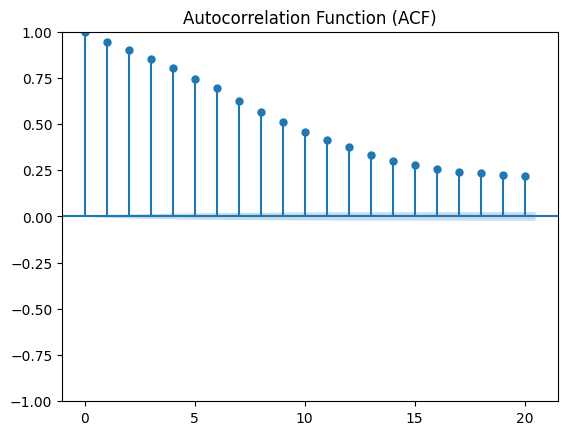

In [9]:
plot_acf(y_train_val, lags=20)
plt.title('Autocorrelation Function (ACF)')
plt.show()

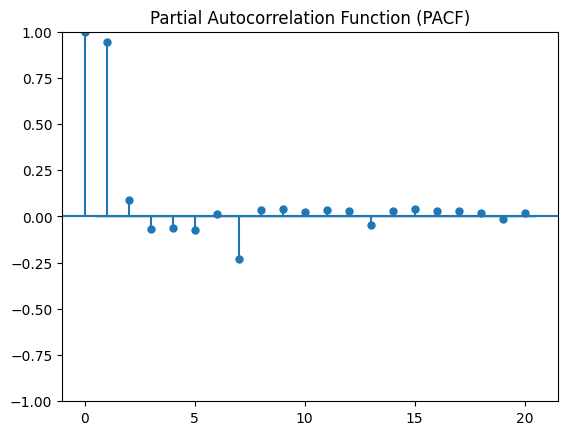

In [10]:
plot_pacf(y_train_val, lags=20)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

In [35]:
arima_order = (2, 0, 2)

In [36]:
arima_model = ARIMA(y_train_val, order=arima_order)
arima_fit = arima_model.fit()

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [37]:
y_pred = arima_fit.forecast(steps=len(y_test))

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [38]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')

RMSE: 1.1115062533319047


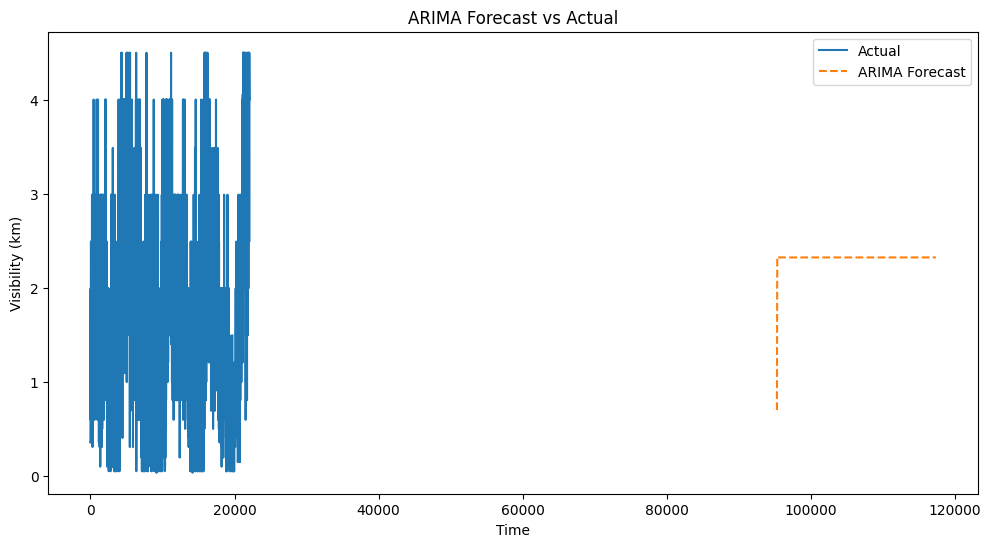

In [39]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='ARIMA Forecast', linestyle='--')
plt.title('ARIMA Forecast vs Actual')
plt.xlabel('Time')
plt.ylabel('Visibility (km)')
plt.legend()
plt.show()